<a href="https://colab.research.google.com/github/Pam-Pam29/Group18-Formative-2-Text-Classification/blob/main/Group18_Formative_2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv'
df = pd.read_csv(url)
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [8]:
# print the information of Df
print("Dataframe info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Sentiments:")
print(df['Sentiment'].unique())

print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB

Missing Values:
Sentence     0
Sentiment    0
dtype: int64

Unique Sentiments:
['positive' 'negative' 'neutral']

Sentiment Distribution:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


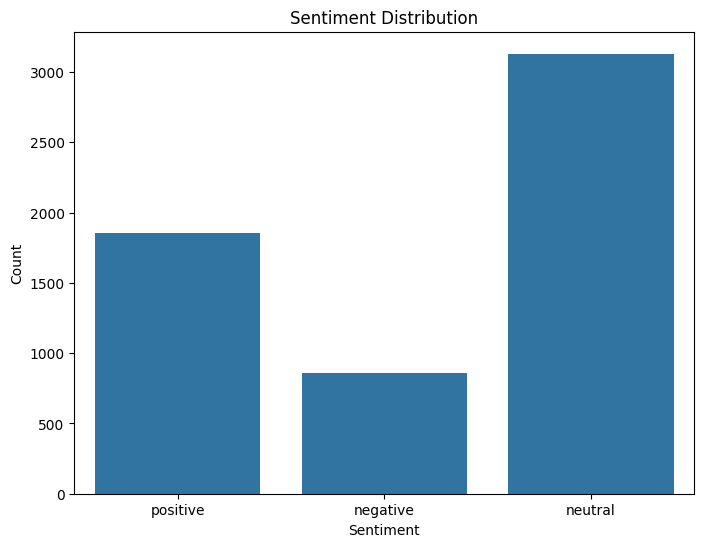

In [9]:
# plotting the df

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [10]:
# Add new columns for text xcter
df['sentence_length'] = df['Sentence'].apply(len)
df['word_count'] = df['Sentence'].apply(lambda x: len(x.split()))

print("\nDescriptive statistics for sentence_length and word_count:")
print(df[['sentence_length', 'word_count']].describe())


Descriptive statistics for sentence_length and word_count:
       sentence_length   word_count
count      5842.000000  5842.000000
mean        117.022253    21.004793
std          56.420425    10.306465
min           9.000000     2.000000
25%          72.000000    13.000000
50%         107.000000    19.000000
75%         150.000000    27.000000
max         315.000000    81.000000


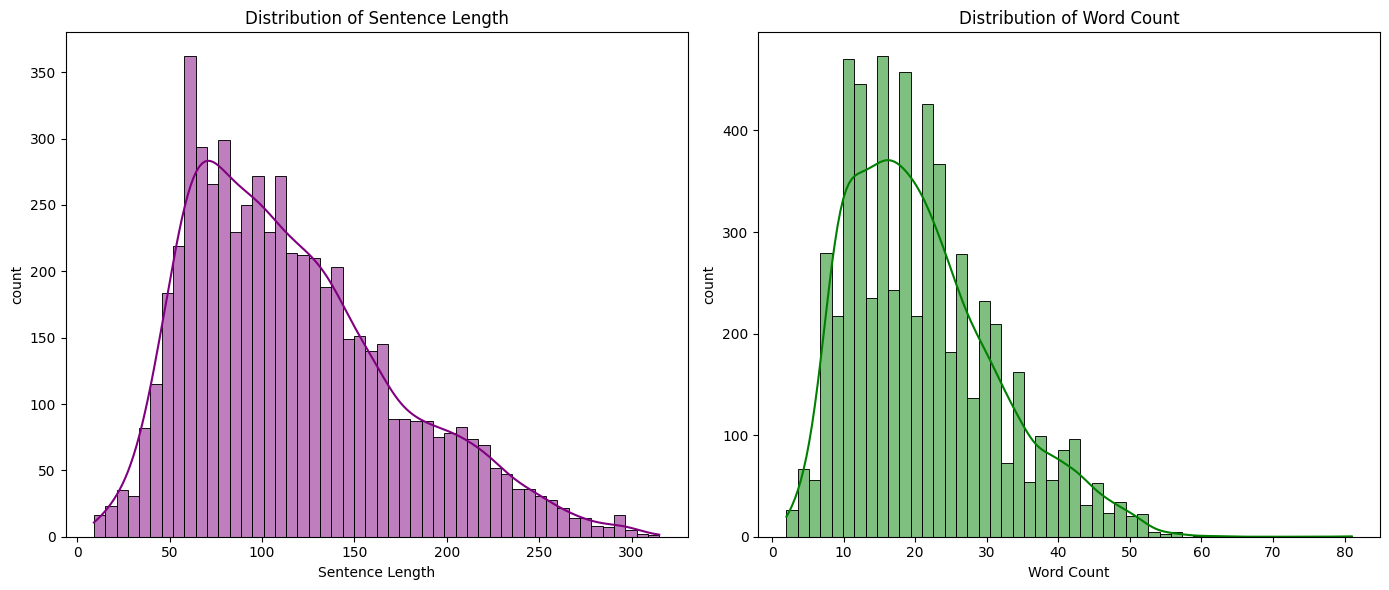

In [11]:
# Create and display histograms for 'sentence_length' and 'word_count'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['sentence_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Sentence Length')
plt.xlabel('Sentence Length')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50, kde=True, color='green')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('count')

plt.tight_layout()
plt.show()

In [12]:
# Necessary import for text data preprocessing & embedding
import nltk
import re

In [15]:
# Download dictionary for NLTK data
try:
  nltk.data.find('corpora/stopwords')
except LookupError:
  nltk.download('stopwords')
try:
  nltk.data.find('tokenizers/punkt')
except LookupError:
  nltk.download('punkt')
try:
  nltk.data.find('tokenizers/punkt_tab')
except LookupError:
  nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punction
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers and special xters
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text) # remaining non-alphanumerical xcter.
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # remove stopwords
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if word not in stop_words]
    text = " ". join(filtered_sentence)
    return text

# Apply the preprocessing function
df['cleaned_sentence'] = df['Sentence'].apply(preprocess_text)

print("First 5 rows of the preprocessed DataFrame:")
print(df[['Sentence', 'cleaned_sentence']].head())
print("\nInfo on the updated DF with 'cleaned_sentence' column:")
print(df.info())


First 5 rows of the preprocessed DataFrame:
                                            Sentence  \
0  The GeoSolutions technology will leverage Bene...   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...   
2  For the last quarter of 2010 , Componenta 's n...   
3  According to the Finnish-Russian Chamber of Co...   
4  The Swedish buyout firm has sold its remaining...   

                                    cleaned_sentence  
0  geosolutions technology leverage benefon gps s...  
1                       esi lows bk real possibility  
2  last quarter componenta net sales doubled eurm...  
3  according finnishrussian chamber commerce majo...  
4  swedish buyout firm sold remaining percent sta...  

Info on the updated DF with 'cleaned_sentence' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sentence          5842 non-nul

In [18]:
from os import X_OK
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'Sentiment' column

label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Display the mapping

print("Sentiment Encoding Mapping:")
for i, sentiment in enumerate(label_encoder.classes_):
    print(f"{sentiment}: {i}")

# Split the data into training and testing sets

X = df['cleaned_sentence']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of sentiment in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of sentiment in testing set:")
print(y_test.value_counts(normalize=True))



Sentiment Encoding Mapping:
negative: 0
neutral: 1
positive: 2

Shape of X_train: (4673,)
Shape of X_test: (1169,)
Shape of y_train: (4673,)
Shape of y_test: (1169,)

Distribution of sentiment in training set:
sentiment_encoded
1    0.536700
2    0.316713
0    0.146587
Name: proportion, dtype: float64

Distribution of sentiment in testing set:
sentiment_encoded
1    0.532079
2    0.318221
0    0.149701
Name: proportion, dtype: float64
